In [261]:
using Plots; gr()
using Reproduce
using FileIO
using Statistics
using ProgressMeter
using JLD2
data_home = "../data/experiment_2/Experiment2"


"../data/experiment_2/Experiment2"

In [262]:
include("./plot_utils.jl")
GPU = GeneralPlotUtils

Main.GeneralPlotUtils

In [263]:
# experiment_folders = ["../data/Experiment1 (copy)"]
# experiment_folders = ["../Experiment1"]
# experiment_folders = ["../data/Experiment1Final"]
experiment_folders = [data_home]

1-element Array{String,1}:
 "../data/experiment_2/Experiment2"

In [280]:
data_key = :ttmaze_old_error

:ttmaze_old_error

In [281]:
ic = ItemCollection(joinpath(experiment_folders[1], "data"));
diff(ic)

Dict{String,Array} with 13 entries:
  "behaviour_learner"    => ["GPI", "Q"]
  "exploration_param"    => [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
  "demon_eta"            => [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]
  "save_keys"            => [["demon_opt", "seed", "demon_eta", "demon_learner"…
  "logger_interval"      => [50, 100]
  "demon_learner"        => ["Q", "SR"]
  "behaviour_update"     => ["ESARSA", "TB", "TabularRoundRobin"]
  "behaviour_eta"        => [0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]
  "save_dir"             => ["Experiment1_long/data", "Experiment2_ESARSA_Q_DEM…
  "demon_alpha_init"     => [0.01, 1.0]
  "demon_opt"            => ["Auto", "Descent"]
  "behaviour_alpha_init" => [0.1, 1.0]
  "seed"                 => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  21, 22, 23, 24, …

In [282]:
# length(search(ic, Dict("demon_learner" => "LSTD")))
length(ic)

31230

In [283]:
algo_divisor_keys = ["behaviour_learner","behaviour_update","demon_learner", "demon_opt", "demon_update", "demon_alpha_init"]
# algo_divisor_keys = ["behaviour_eta"]
# algo_divisor_keys = []
# sweep_params = ["demon_eta"]
sweep_params = ["demon_eta", "behaviour_eta", "exploration_param"]

algo_specs_full = GPU.split_algo(ic, algo_divisor_keys)
# algo_specs_full = ic

["behaviour_learner", "behaviour_update", "demon_learner", "demon_opt", "demon_update", "demon_alpha_init"]


48-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","demon_alpha_init" => 0.01,"behaviour_learner" => "GPI","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","demon_alpha_init" => 1.0,"behaviour_learner" => "GPI","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","demon_alpha_init" => 0.01,"behaviour_learner" => "GPI","demon_opt" => "Descent")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","demon_alpha_init" => 1.0,"behaviour_learner" => "GPI","demon_opt" => "Descent")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","demon_alpha_init" => 0.01,"behaviour_learner" => "GPI","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","demon_alpha_init" => 1.0,"behaviour_learner" => "GPI","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","demon_alpha

In [284]:
all_algos_ics = [search(ic,algo_spec) for algo_spec in algo_specs_full]
# all_algos_ics = [search(ic,algo_specs_full)]
length.(all_algos_ics)


48-element Array{Int64,1}:
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
    0
 4320
    ⋮
    0
    0
    0
    0
    0
    0
    0
    0
    0
  150
    0
    0

In [285]:
valid_algos_ind = findall(a -> length(a) != 0, all_algos_ics)

algo_specs = algo_specs_full[valid_algos_ind]
algo_ics = all_algos_ics[valid_algos_ind]

7-element Array{ItemCollection,1}:
 ItemCollection(Reproduce.Item[Reproduce.Item("../data/experiment_2/Experiment2/data/RP_0_0x1005615e9e537206", Dict{String,Any}("logger_keys" => ["TTMAZE_ERROR", "TTMAZE_UNIFORM_ERROR", "TTMAZE_OLD_ERROR"],"steps" => 30000,"behaviour_learner" => "GPI","exploration_param" => 0.1,"exploration_strategy" => "epsilon_greedy","use_external_reward" => true,"demon_eta" => 0.25,"horde_type" => "regular","drifter" => [1.0, 0.1],"_GIT_INFO" => "0"…), ["logger_keys", "steps", "behaviour_learner", "exploration_param", "exploration_strategy", "use_external_reward", "demon_eta", "horde_type", "drifter", "demon_lambda"  …  "cumulant_schedule", "demon_alpha_init", "exploring_starts", "demon_opt", "behaviour_alpha_init", "constant_target", "seed", "demon_discounts", "demon_policy_type", "intrinsic_reward"]), Reproduce.Item("../data/experiment_2/Experiment2/data/RP_0_0x1042c4f5f126f123", Dict{String,Any}("logger_keys" => ["TTMAZE_ERROR", "TTMAZE_UNIFORM_ERROR", "TTMAZE_

In [286]:
algo_specs

7-element Array{Any,1}:
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "TB","demon_alpha_init" => 0.01,"behaviour_learner" => "GPI","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "TB","demon_alpha_init" => 1.0,"behaviour_learner" => "GPI","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","demon_alpha_init" => 0.01,"behaviour_learner" => "Q","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "Q","behaviour_update" => "ESARSA","demon_alpha_init" => 0.01,"behaviour_learner" => "Q","demon_opt" => "Descent")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","demon_alpha_init" => 0.01,"behaviour_learner" => "Q","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "ESARSA","demon_alpha_init" => 1.0,"behaviour_learner" => "Q","demon_opt" => "Auto")
 Dict{Any,Any}("demon_learner" => "SR","behaviour_update" => "TabularRoundRobin","demon_alpha_init"

In [287]:
best_per_algo_ics = []
for (i,algo_ic) in enumerate(algo_ics)
    println(i)
    push!(best_per_algo_ics, GPU.get_best(algo_ic,sweep_params, data_key))
end

1
["demon_eta", "behaviour_eta", "exploration_param"]
[1.6459176433994913, 1.4952703863950965, 1.660527987848533, 1.3046481630768947, 1.3443268482228485, 1.1436705750444278, 1.5374093822057973, 1.4279163447832097, 1.3242611543351244, 1.3042126545292918, 1.1840691140497421, 1.2110748411861694, 1.444769131524775, 1.387662649352354, 1.3406350956300532, 1.3670240940144152, 1.5217266500730677, 1.2912013594812461, 1.5183283530193803, 1.4258367554330644, 1.4841834825457598, 1.4154407680704282, 1.3038356896859602, 1.3112348146034545, 1.5936194581061858, 1.5690100224988532, 1.5211713664847828, 1.5397113185795768, 1.4328613544343451, 1.4609834804551838, 1.609873596802039, 1.546397079836817, 1.508319850856142, 1.5061416462529742, 1.593086931228537, 1.4863300074386498, 1.492582741574765, 1.4095108518873143, 1.3594916303811437, 1.1287759985510906, 1.1726293049812406, 1.1779739116916175, 1.3456865602106898, 1.3006539333146687, 1.2048009617058324, 1.0364666795331128, 1.1044007326137881, 1.10675267953

[1.6640663679498615, 1.6565337908048843, 1.5908344183039314, 1.5941271256628076, 1.635126013891151, 1.7093902325332226, 1.514397255443496, 1.7477468888310494, 1.5414742616676844, 1.55980493023644, 1.554653426130551, 1.706640166890005, 1.445365593687469, 1.572374586128789, 1.4292643158443286, 1.5756224024796235, 1.4737573339008914, 1.6337244510320774, 1.5299219006607538, 1.5005399441304839, 1.5586540660179724, 1.6720717710479933, 1.4768873066243227, 1.5141682256640325, 1.5390701072192237, 1.5936099559066286, 1.633283831535292, 1.5141897783236513, 1.5320086873399446, 1.4228228243447552, 1.5357435438318336, 1.662553968561419, 1.6468326363728014, 1.5274742482085446, 1.401254463414829, 1.559087850965723, 1.6299151234021199, 1.6425257463180476, 1.7020364632690401, 1.6296292828670627, 1.437579204056407, 1.314610587113382, 1.6099836605722728, 1.6534868908133322, 1.6452393831167809, 1.6896657225444807, 1.4834426077666247, 1.6350546601276745, 1.6274455099678058, 1.5743538619710773, 1.61819887733

[0.08276955835069336, 0.07631406041562999, 0.0719434828123582, 0.06972250500252668, 0.1287430908207227]


In [288]:
length.(best_per_algo_ics)

7-element Array{Int64,1}:
 30
 30
 30
 30
 30
 30
 30

In [289]:
data = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[1],10) for ic in best_per_algo_ics]
std = [GPU.smooth(GPU.get_stats(GPU.load_results(ic,data_key))[2],10) for ic in best_per_algo_ics]

size(GPU.load_results(best_per_algo_ics[1], data_key))
# GVF x timesteps x num_runs
# tst = GPU.load_results(best_per_algo_ics[1], data_key)
# size(tst)
# std(sum(tst,dims=1)[1,:,:], dims =2)
# methods(std)
# std(tst,dims=3)
# GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key))[2]

(4, 300, 30)

In [290]:
#Accidentally ran TabularRoundRobin at twice the loging frequency
# println(length(data[7]))

# if length(data[7]) > 300
#     odd_inds = [i for i in 1:2:length(data[6])]
# #     @show data[7]
#     data[7] = data[7][odd_inds]
#     std[7] = std[7][odd_inds]
# end

In [291]:
algo_specs
[GPU.print_params(algo, algo_divisor_keys, sweep_params) for algo in best_per_algo_ics]

For IC: 
behaviour_learner  GPI
behaviour_update  TB
demon_learner  SR
demon_opt  Auto
demon_update  TB
demon_alpha_init  0.01
demon_eta  1.0
behaviour_eta  0.125
exploration_param  0.4

For IC: 
behaviour_learner  GPI
behaviour_update  TB
demon_learner  SR
demon_opt  Auto
demon_update  TB
demon_alpha_init  1.0
demon_eta  0.5
behaviour_eta  0.5
exploration_param  0.4

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  Q
demon_opt  Auto
demon_update  TB
demon_alpha_init  0.01
demon_eta  0.5
behaviour_eta  0.25
exploration_param  0.6

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  Q
demon_opt  Descent
demon_update  TB
demon_alpha_init  0.01
demon_eta  0.5
behaviour_eta  0.5
exploration_param  0.5

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_learner  SR
demon_opt  Auto
demon_update  TB
demon_alpha_init  0.01
demon_eta  1.0
behaviour_eta  0.25
exploration_param  0.4

For IC: 
behaviour_learner  Q
behaviour_update  ESARSA
demon_lear

7-element Array{Nothing,1}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [292]:
label_keys = cat(algo_divisor_keys,sweep_params, dims = 1)
labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
labels = cat(labels..., dims=2)

1×7 Array{String,2}:
 " GPI TB SR Auto TB 0.01 1.0 0.125 0.4"  …  " Q TabularRoundRobin SR Auto TB 1.0 0.5 0.5 0.0"

In [229]:
# labels = [GPU.get_label(algo, label_keys) for algo in best_per_algo_ics]
ylabel = "RMSE"
title = "SR Demons & Step Size Adaptation vs More Naive Approaches"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
(:tab10)
plot(xticks, data, ylabel=ylabel, palette=:tab10, label= labels, ylims=(0,4), grid=true, ribbon = std/sqrt(30), legend=:topright, title=title)

BoundsError: [91mBoundsError: attempt to access 150-element Array{Float64,1} at index [1:300][39m

In [182]:
savefig("./plots/experiment2/more_naive_approaches.png")

In [278]:
#Replicating plot from Experiment 1.
# inds_to_replicate = [1,3,4,8]
inds_to_replicate = [1,2,5,6]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]
@show length(std)
label_subset

length(std) = 7


1×4 Array{String,2}:
 " GPI TB SR Auto TB 0.01 1.0 0.125 0.4"  …  " Q ESARSA SR Auto TB 1.0 0.5 0.25 0.4"

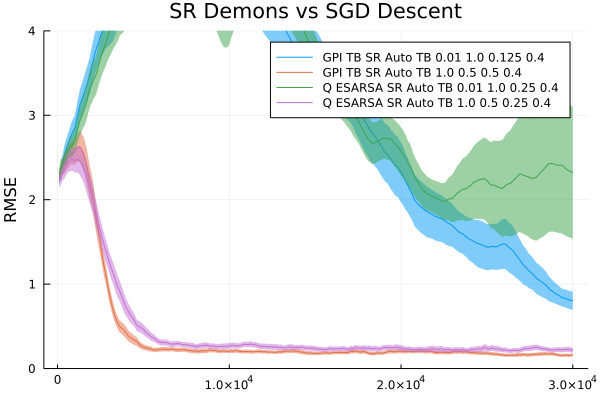

In [279]:
# title = "High vs Low Alpha Init"
title = "SR Demons vs SGD Descent"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,4))

In [260]:
savefig("./plots/experiment2/high_vs_low_alpha_init.png")

In [234]:
inds_to_replicate = [5,6,7]
label_subset = labels[:,inds_to_replicate]
data_subset = data[inds_to_replicate]

4-element Array{Array{Float64,1},1}:
 [1.9181099487646451, 2.0293219787507892, 2.085500089730406, 2.1689908079448075, 2.2267692104209766, 2.2703040034826185, 2.321169368235307, 2.3694877705617365, 2.409609985125206, 2.4335928301580863  …  0.9202426225583491, 0.9094567620515683, 0.8949646678312002, 0.8838595427302247, 0.8768503837289027, 0.8714859484719932, 0.8610139435489085, 0.8538226379306533, 0.8480630649001251, 0.8428000492118735]
 [1.9537244996467416, 2.04516135675983, 2.0638841109262476, 2.088796053561995, 2.128620228840288, 2.1589135181746393, 2.191951729637584, 2.2189263973752857, 2.226499963947538, 2.2381940037899923  …  0.13975068060644436, 0.13572326379560615, 0.1339151639546532, 0.13258783439051863, 0.13557591606790742, 0.13610094537458237, 0.135439184595546, 0.13298289258891952, 0.1366094642283759, 0.13732975941501385]
 [1.9689353649783379, 2.0474267071912893, 2.072770850159802, 2.112071594340513, 2.156473418090883, 2.2077415614232145, 2.241628747920714, 2.2539388901783086

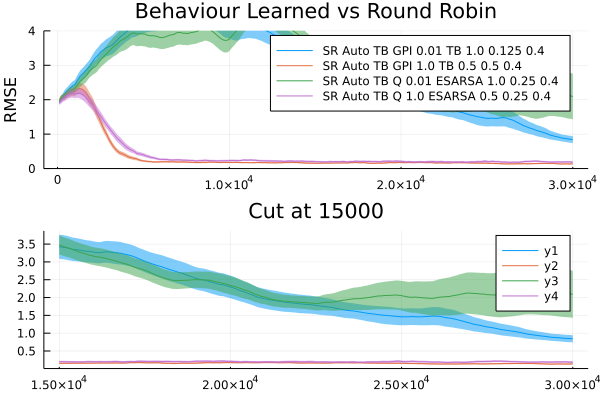

In [235]:
title = "Behaviour Learned vs Round Robin"
ylabel = "RMSE"
step_increment=100
num_samples = length(data[1])
xticks=collect(step_increment:step_increment:num_samples*step_increment)
p1 = plot(xticks, data_subset,ylabel= ylabel, label= label_subset, ribbon = std[inds_to_replicate]/sqrt(30), legend=:topright, title=title, ylims=(0,4))

start_pos = 150
new_x_ticks = collect(step_increment * start_pos:step_increment:num_samples*step_increment)
data_subset_cut = [s[start_pos:end] for s in data_subset]
std_subset_cut = [s[start_pos:end] for s in std[inds_to_replicate]/sqrt(30)]
p2 = plot(new_x_ticks,data_subset_cut, ribbon = std_subset_cut, title="Cut at $(step_increment * start_pos)")

plot(p1,p2, layout = (2,1), figsize=(20,20))


In [203]:
savefig("./plots/experiment2/learned_vs_round_robin.png")

In [447]:
data_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[1] for ic in best_per_algo_ics]
std_per_gvf = [GPU.get_stats(GPU.load_results(ic,data_key), per_gvf=true)[2] for ic in best_per_algo_ics]

7-element Array{Array{Float64,2},1}:
 [0.0583830341159143 0.06624647800274217 … 0.025331506725205462 0.024397293962268633; 0.03889287145799879 0.03446226870970493 … 0.014794991119714154 0.01528194549588694; 0.3079138638493579 0.35845048085670994 … 0.9572012726441534 0.9556570344074108; 0.035480788145793404 0.031832843362199124 … 0.015620569934822087 0.01531906940544899]
 [0.05746913114522719 0.060282673279872516 … 0.06374158349618055 0.0663021718397726; 0.04238311595926881 0.04003501526891254 … 0.05524423798772834 0.05587831566970883; 0.3171130805123134 0.3811126732560389 … 0.5272433890472962 0.5564420792754703; 0.04308688359476702 0.04525075299928103 … 0.051676072712286886 0.0507582939644684]
 [0.08544790467545224 0.06717454621790661 … 0.08152217411938359 0.08263905464901689; 0.06831416291205408 0.04849036245726658 … 0.06357413347350213 0.06104375465736899; 0.27642337654811006 0.2944612366188357 … 0.44236477127168583 0.392611894224175; 0.05330815977525475 0.04235849230265052 … 0.06063

In [382]:
GPU.get_stats(GPU.load_results(best_per_algo_ics[1],data_key), per_gvf=true)[2]

4×40 Array{Float64,2}:
 0.058383   0.0662465  0.0679944  …  0.0257236  0.0253315  0.0243973
 0.0388929  0.0344623  0.0264279     0.0146811  0.014795   0.0152819
 0.307914   0.35845    0.380958      0.934579   0.957201   0.955657
 0.0354808  0.0318328  0.0251053     0.016249   0.0156206  0.0153191

In [420]:
data[1] .== data[3]

4×40 BitArray{2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0

In [446]:
inds_to_replicate

4-element Array{Int64,1}:
 1
 2
 3
 6

In [451]:
ps = []
for ind in inds_to_replicate
    label_subset = labels[:,ind]
    data_subset = data_per_gvf[ind]
    std_subset = std_per_gvf[ind]
    @show size(std_subset)
    xticks=collect(step_increment:step_increment:num_samples*step_increment)
    p = plot(xticks,data_subset',label= ["Distractor" "Const" "Drifter" "Const"], ribbon = (std_subset/sqrt(100))', legend=:bottomleft, title=labels[ind], ylims=(0,1.25))
    push!(ps,p)
end

size(std_subset) = (4, 40)
size(std_subset) = (4, 40)
size(std_subset) = (4, 40)
size(std_subset) = (4, 40)


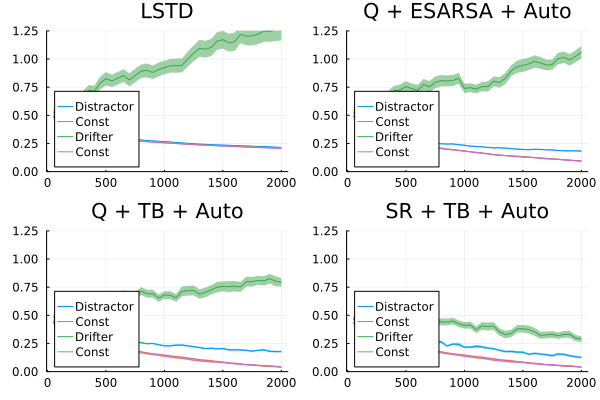

In [452]:
plot(ps..., layout=(2,2))

In [453]:
savefig("./plots/TabTMazeRoundRobin_per_gvf.png")